In [1]:
# imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random
from keras.utils.np_utils import to_categorical 


Using TensorFlow backend.


In [2]:
# load data in pd
all_training_values = pd.read_csv('./digit-recognizer/train.csv')
test_values = pd.read_csv('./digit-recognizer/test.csv')

print(all_training_values.shape, test_values.shape)
all_training_values.head()

(42000, 785) (28000, 784)


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
all_training_vallues = all_training_values.sample(frac=1)
x_all = all_training_values.iloc[:,1:]
y_all = all_training_values.iloc[:,:1]

In [4]:
x_all.shape

(42000, 784)

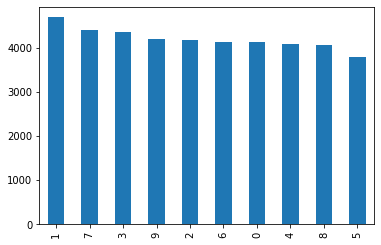

In [5]:
# plot some examples in the dataset

all_training_values["label"].value_counts().plot(kind="bar")


In [6]:
x_all = pd.concat([x_all, x_all]) / 255.0
y_all = pd.concat([y_all, y_all])
test_values = test_values / 255.0

In [7]:
print(x_all.shape, y_all.shape)

(84000, 784) (84000, 1)


In [8]:
# generate extra training and testing data by resizing
#...some drawings and moving them in random areas in the 28*28 tile

# iterate trough all rows and create a duplicate that is slightly modified in a
#random manner. Resize content and pad with empty pixels

def resize(img, scale=0.5):
    height, width = img.shape
    new_height = new_width = random.randrange(height*scale,height*2)
    
    resized = cv2.resize(np.uint8(img), dsize=(new_height,new_height))
    return resized, new_height, new_width



def create_random(img,height=28,width=28,scale=2):
    #out image is scaled 
    #reshape original img to matrix
    #upscale original img image
    
    out = np.zeros((height*scale,width*scale))
    
    
    
    #img = img.to_numpy().reshape(height,width)    
    imgFiltered = np.where(img.to_numpy().reshape(height,width)  > 0, 1 , 0)
    #imgFiltered = cv2.resize(np.uint8(imgFiltered), dsize=(height*scale,width*scale))

    #print(np.where(img > 0, 1 , 0))
    #new_height = new_width = random.randrange(height/2,height)
    
    #resized = cv2.resize(imgFiltered, dsize=(new_height,new_height))

    
    resized, new_width, new_height = resize(imgFiltered)
    newX = random.randrange(0, height*scale - new_height)
    newY = random.randrange(0, width*scale - new_width)
    
    out[newX:newX+new_width, newY:newY+new_height] = resized
    
    out = np.where(out>0, 1, 0)

    return(out) 



def modify_dataset(x): 
    X_all = []
    for (index, row) in x.iterrows():
        #print(index, row)
        X_all.append(create_random(row))
    return X_all


X_all = modify_dataset(x_all)
# plot exaple of generated images
# add generated images

In [9]:
X_all = np.array(X_all)
y_all = np.array(y_all)

In [10]:
X_all.shape # convert to one-hot-encoding


(84000, 56, 56)

In [11]:
# create the training, validation and testing sets
X_training = X_all[:60000]
Y_training = y_all[:60000]

X_validate = X_all[60000:]
Y_validate = y_all[60000:]

In [12]:
type(X_training)

numpy.ndarray

In [13]:
xTrain = X_training.reshape(-1,56,56,1)
yTrain = to_categorical(Y_training, num_classes=10)
xVal = X_validate.reshape(-1,56,56,1)
yVal = to_categorical(Y_validate, num_classes=10)


/home/andrei/anaconda3/envs/handwritedigit/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


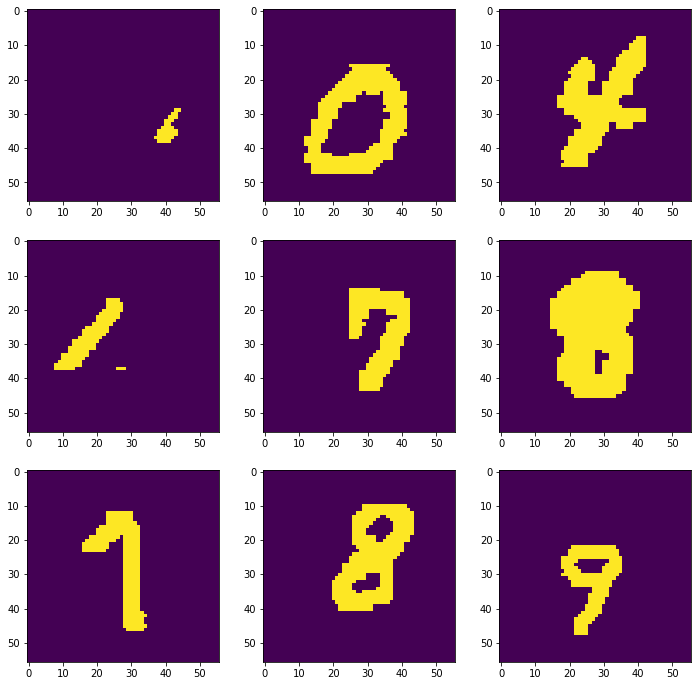

In [14]:
shape = (56,56)
fig = plt.figure(figsize=(12, 12))

fig.add_subplot(331)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))

fig.add_subplot(331)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))

fig.add_subplot(332)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))
fig.add_subplot(333)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))
fig.add_subplot(334)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))
fig.add_subplot(335)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))
fig.add_subplot(336)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))
fig.add_subplot(337)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))
fig.add_subplot(338)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))
fig.add_subplot(339)
plt.imshow(xTrain[random.randrange(1,60000)].reshape(shape))

In [15]:
yVal.shape

(24000, 10)

In [16]:
# reshape the sets to the model input

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau


In [18]:
import tensorflow as tf
import keras
from keras.backend.tensorflow_backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
                                    # (nothing gets printed in Jupyter, only if you run it standalone)
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)  # set this TensorFlow session as the default session for Keras

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:26:00.0, compute capability: 7.5
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [19]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
# define cnn architecture
# define optimizer, lr, etc.
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(56,56,1)))#kernel=(3,3)?
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        
history = AccuracyHistory()

In [21]:
# fit model
history = model.fit(xTrain, yTrain,
          batch_size=50,
          epochs=30,
          verbose=1,
          validation_data=(xVal, yVal),
          callbacks=[history])

Train on 60000 samples, validate on 24000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 166us/step - loss: 0.7254 - accuracy: 0.7490 - val_loss: 0.2841 - val_accuracy: 0.9105
Epoch 2/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.2818 - accuracy: 0.9081 - val_loss: 0.1845 - val_accuracy: 0.9423
Epoch 3/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.2025 - accuracy: 0.9347 - val_loss: 0.1612 - val_accuracy: 0.9489
Epoch 4/30
60000/60000 [==============================] - 8s 141us/step - loss: 0.1677 - accuracy: 0.9456 - val_loss: 0.1350 - val_accuracy: 0.9577
Epoch 5/30
60000/60000 [==============================] - 8s 142us/step - loss: 0.1441 - accuracy: 0.9531 - val_loss: 0.1338 - val_accuracy: 0.9591
Epoch 6/30
60000/60000 [==============================] - 8s 141us/step - loss: 0.1246 - accuracy: 0.9592 - val_loss: 0.1181 - val_accuracy: 0.9638
Epoch 7/30
60000/60000 [==============================] - 8s 

In [ ]:
#ADD DROPOUTS!!! 

# test model

In [ ]:
# predict some example

In [23]:
# save the model & convert to tfjs 
model.save("model9664.h5")

In [ ]:
demo = xTrain[5].reshape(-1,56,56,1)
model.predict(demo)

In [ ]:
plt.imshow(xTrain[5].reshape(56,56))

In [ ]:
print(history.history.keys())

Text(0.5, 1.0, 'Training loss vs. validation loss with deopout and 3*3 kernel')

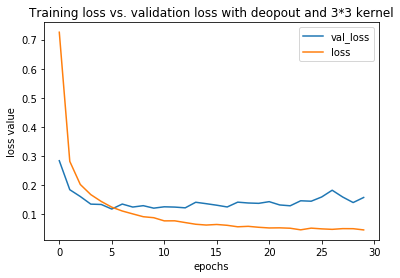

In [22]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend(['val_loss', 'loss'], loc='upper right')
plt.title('Training loss vs. validation loss with deopout and 3*3 kernel')